In [1]:
#@title Import required libraries
import os
import torch

import PIL
from PIL import Image

from diffusers import StableDiffusionPipeline,AutoencoderKL,UNet2DConditionModel
from transformers import CLIPFeatureExtractor, CLIPTextModel, CLIPTokenizer

pretrained_model_name_or_path = "SG161222/Realistic_Vision_V6.0_B1_noVAE"
vae_name = "stabilityai/sd-vae-ft-mse"
vae = AutoencoderKL.from_pretrained(vae_name, torch_dtype=torch.float16)
pipe = StableDiffusionPipeline.from_pretrained(
    pretrained_model_name_or_path,
    vae = vae,
    torch_dtype=torch.float16
).to("cuda")

prompt = "a picture of ((sks man)),(beard),masculine face, short hair, professional jack suite, professional headshots, photo-realistic, 4k, high-resolution image, workplace settings, upper body"
negative_prompt = "woman, asian, multiple heads, 2 heads, elongated body, double image, 2 faces, multiple people (deformed iris, deformed pupils, semi-realistic, cgi, 3d, render, sketch, cartoon, drawing, anime:1.4)"

seed = 420
version = 1200
unet_path = f"/kaggle/input/dreambooth-lala/dreambooth_model/checkpoint-{version}/unet"
custom_unet = UNet2DConditionModel.from_pretrained(
        unet_path,
        torch_dtype=torch.float16
    )
pipe.unet = custom_unet
pipe.unet.to(pipe.device)
generator = torch.Generator(device="cuda").manual_seed(seed)

images = pipe(
    prompt,
    negative_prompt=negative_prompt,
    num_images_per_prompt=10,
    num_inference_steps=250,
    guidance_scale=10,
    generator=generator 
).images
output_dir = "./generated_images"
os.makedirs(output_dir, exist_ok=True)
for idx, img in enumerate(images):
    filename = f"{output_dir}/step-{version}_itay_img-{idx}.png"
    img.save(filename)

2025-05-08 09:49:28.200834: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1746697768.423971      31 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1746697768.491491      31 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


config.json:   0%|          | 0.00/547 [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/335M [00:00<?, ?B/s]

model_index.json:   0%|          | 0.00/624 [00:00<?, ?B/s]

Fetching 13 files:   0%|          | 0/13 [00:00<?, ?it/s]

config.json:   0%|          | 0.00/560 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/4.58k [00:00<?, ?B/s]

scheduler_config.json:   0%|          | 0.00/374 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/1.22G [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/492M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/472 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/737 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/1.78k [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/520 [00:00<?, ?B/s]

diffusion_pytorch_model.bin:   0%|          | 0.00/3.44G [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

An error occurred while trying to fetch /root/.cache/huggingface/hub/models--SG161222--Realistic_Vision_V6.0_B1_noVAE/snapshots/9a857a696b9aabbf509073e0aa55ec8200b6ef7d/unet: Error no file named diffusion_pytorch_model.safetensors found in directory /root/.cache/huggingface/hub/models--SG161222--Realistic_Vision_V6.0_B1_noVAE/snapshots/9a857a696b9aabbf509073e0aa55ec8200b6ef7d/unet.
Defaulting to unsafe serialization. Pass `allow_pickle=False` to raise an error instead.
/usr/local/lib/python3.11/dist-packages/transformers/models/clip/feature_extraction_clip.py:28: FutureWarning: The class CLIPFeatureExtractor is deprecated and will be removed in version 5 of Transformers. Please use CLIPImageProcessor instead.
  warnings.warn(


  0%|          | 0/250 [00:00<?, ?it/s]

In [2]:
#@title Import required libraries
import os
import torch

import PIL
from PIL import Image

from diffusers import StableDiffusionPipeline,AutoencoderKL,UNet2DConditionModel
from transformers import CLIPFeatureExtractor, CLIPTextModel, CLIPTokenizer

pretrained_model_name_or_path = "SG161222/Realistic_Vision_V6.0_B1_noVAE"
vae_name = "stabilityai/sd-vae-ft-mse"
vae = AutoencoderKL.from_pretrained(vae_name, torch_dtype=torch.float16)
pipe = StableDiffusionPipeline.from_pretrained(
    pretrained_model_name_or_path,
    vae = vae,
    torch_dtype=torch.float16
).to("cuda")

import matplotlib.pyplot as plt
prompt = "a portrait of ((sks woman))  wearing a business suit, model photoshoot, professional photo, white background, Amazing Details, Best Quality, Masterpiece, dramatic lighting highly detailed, analog photo, overglaze, 80mm Sigma f/1.4 or any ZEISS lens"
negative_prompt = "(deformed iris, deformed pupils, semi-realistic, cgi, 3d, render, sketch, cartoon, drawing, anime), (nsfw)+, text, cropped, out of frame, worst quality, low quality, jpeg artifacts, ugly, duplicate, morbid, mutilated, extra fingers, mutated hands, poorly drawn hands, poorly drawn face, mutation, deformed, blurry"

seed = 420  # Set a fixed seed for reproducibility
version = 800
unet_path = f"/kaggle/input/irit-dreambooth-lala/dreambooth_model/checkpoint-{version}/unet"
custom_unet = UNet2DConditionModel.from_pretrained(
        unet_path,
        torch_dtype=torch.float16
    )
pipe.unet = custom_unet
pipe.unet.to(pipe.device)
# Create a generator with the specified seed
generator = torch.Generator(device="cuda").manual_seed(seed)
  
images = pipe(
    prompt,
    negative_prompt=negative_prompt,
    num_images_per_prompt=10,
    num_inference_steps=150,
    guidance_scale=10,
    generator=generator 
).images
    
output_dir = "./generated_images"
os.makedirs(output_dir, exist_ok=True)
for idx, img in enumerate(images):
    filename = f"{output_dir}/step-{version}_irit_img-{idx}.png"
    img.save(filename)

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

An error occurred while trying to fetch /root/.cache/huggingface/hub/models--SG161222--Realistic_Vision_V6.0_B1_noVAE/snapshots/9a857a696b9aabbf509073e0aa55ec8200b6ef7d/unet: Error no file named diffusion_pytorch_model.safetensors found in directory /root/.cache/huggingface/hub/models--SG161222--Realistic_Vision_V6.0_B1_noVAE/snapshots/9a857a696b9aabbf509073e0aa55ec8200b6ef7d/unet.
Defaulting to unsafe serialization. Pass `allow_pickle=False` to raise an error instead.


  0%|          | 0/150 [00:00<?, ?it/s]

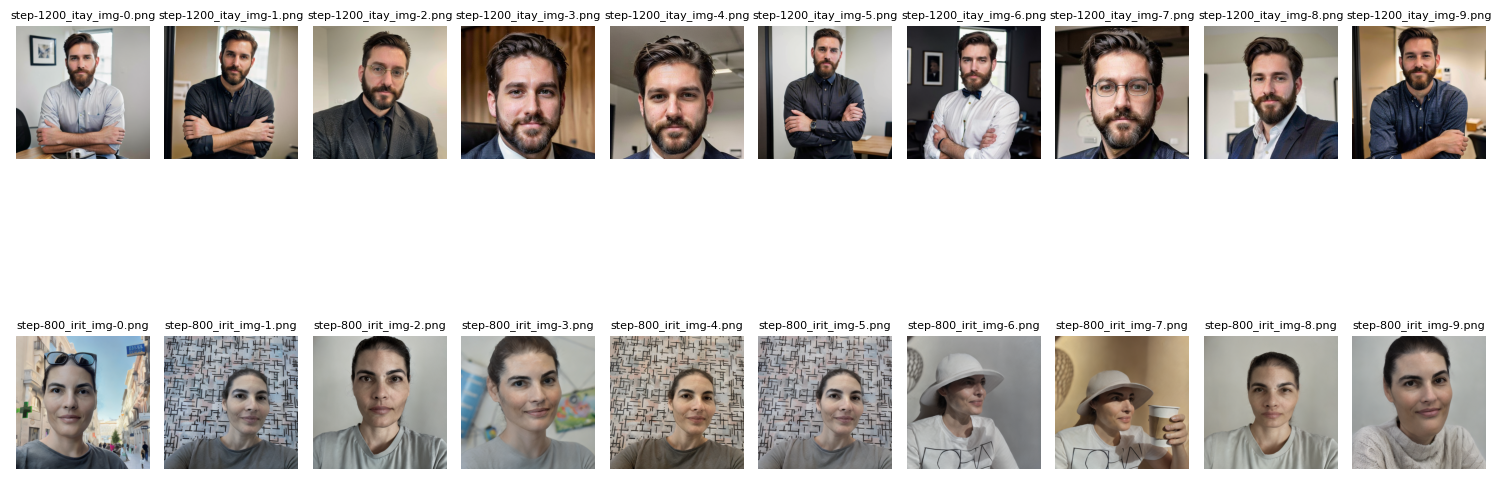

In [3]:
from PIL import Image
import matplotlib.pyplot as plt

# Hiển thị tất cả ảnh đã lưu
saved_images = sorted([f for f in os.listdir(output_dir) if f.endswith(".png")])

plt.figure(figsize=(15, 8))  # Tùy chỉnh kích thước theo số ảnh
for i, filename in enumerate(saved_images):
    img_path = os.path.join(output_dir, filename)
    img = Image.open(img_path)
    
    plt.subplot(2, (len(saved_images) + 1) // 2, i + 1)  # Hiển thị theo grid 2 hàng
    plt.imshow(img)
    plt.title(filename, fontsize=8)
    plt.axis('off')

plt.tight_layout()
plt.show()